In [85]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import urllib.request

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load Data

In [86]:
def download_file(url, filepath):
    urllib.request.urlretrieve(url, filepath)

In [87]:
url = "https://raw.githubusercontent.com/iwanami-datascience/vol3/master/kato%26hoshino/q_data_x.csv"
filepath = "../data/sample.csv"

if not os.path.exists(filepath):
    download_file(url, filepath)

raw_df = pd.read_csv(filepath)

In [88]:
print(f'データサイズ: {raw_df.shape[0]:,}')
raw_df.head()

データサイズ: 10,000


,cm_dummy,gamedummy,area_kanto,area_keihan,area_tokai,area_keihanshin,age,sex,marry_dummy,job_dummy1,...,T,F1,F2,F3,M1,M2,M3,TVwatch_day,gamesecond,gamecount
0,0,0,0,0,0,1,44.5,1,1,1,...,0,0,0,0,0,1,0,33.427600,0,0
1,0,0,0,1,0,0,34.5,1,1,1,...,0,0,0,0,0,1,0,31.542862,0,0
2,0,0,0,1,0,0,24.5,1,0,0,...,0,0,0,0,1,0,0,37.825805,0,0
3,0,0,0,1,0,0,44.5,1,1,1,...,0,0,0,0,0,1,0,36.345911,0,0
4,0,0,0,1,0,0,34.5,1,1,1,...,0,0,0,0,1,0,0,49.344942,0,0


In [89]:
raw_df.dtypes

cm_dummy             int64
gamedummy            int64
area_kanto           int64
area_keihan          int64
area_tokai           int64
area_keihanshin      int64
age                float64
sex                  int64
marry_dummy          int64
job_dummy1           int64
job_dummy2           int64
job_dummy3           int64
job_dummy4           int64
job_dummy5           int64
job_dummy6           int64
job_dummy7           int64
job_dummy8           int64
inc                float64
pmoney             float64
fam_str_dummy1       int64
fam_str_dummy2       int64
fam_str_dummy3       int64
fam_str_dummy4       int64
fam_str_dummy5       int64
child_dummy          int64
T                    int64
F1                   int64
F2                   int64
F3                   int64
M1                   int64
M2                   int64
M3                   int64
TVwatch_day        float64
gamesecond           int64
gamecount            int64
dtype: object

## Estimate Effect

In [162]:
%load_ext autoreload
%autoreload 
from libs import PropensityScoreModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [164]:
df = raw_df.copy()
treatment = 'cm_dummy'
covariate = [
    'TVwatch_day', 'age', 'sex', 'marry_dummy', 'child_dummy', 'inc', 'pmoney', 'area_kanto',
    'area_tokai', 'area_keihanshin', 'job_dummy1', 'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5',
    'job_dummy6', 'job_dummy7', 'fam_str_dummy1', 'fam_str_dummy2','fam_str_dummy3', 'fam_str_dummy4']
outcomes = ['gamedummy', 'gamecount', 'gamesecond']

model = LogisticRegression
scaler = preprocessing.MinMaxScaler()
params = {'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 42}

ps_model = PropensityScoreModel(df, treatment, covariate, outcomes, model, params, scaler)

In [165]:
# Estimate ATE
ps_model.estimate_ate()

,Treated,Untreated,ATE
gamedummy,0.093395,0.065851,0.027544
gamecount,13.175945,8.796591,4.379355
gamesecond,3975.523854,2789.133286,1186.390568


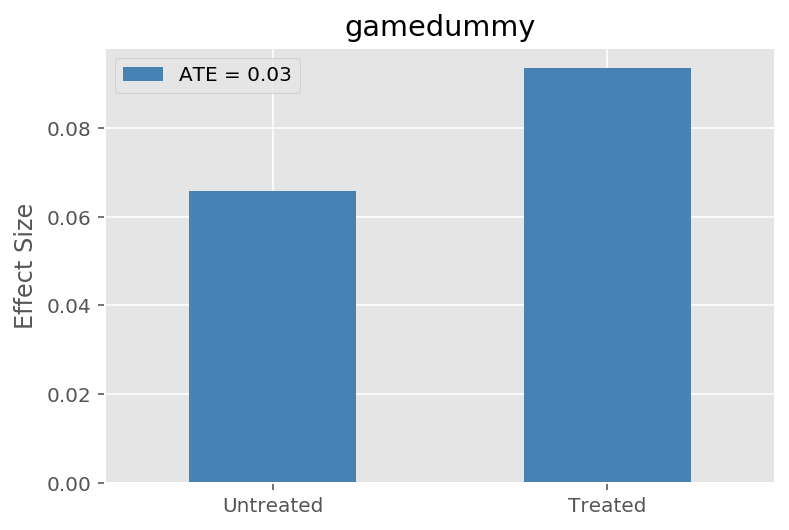

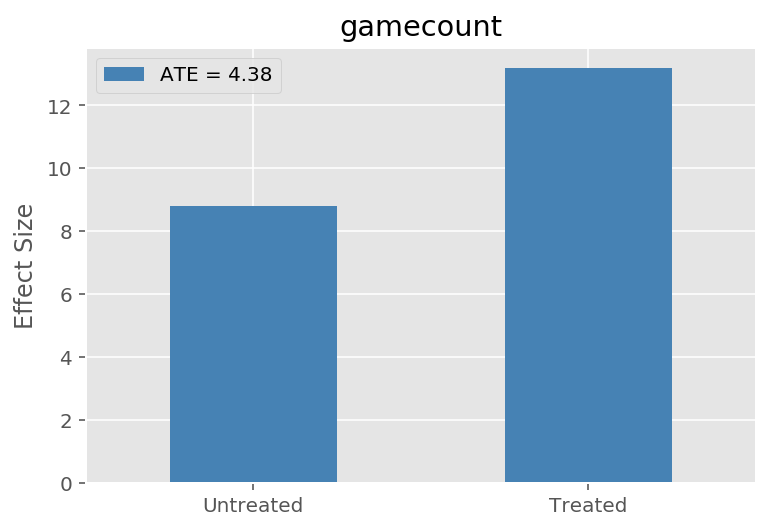

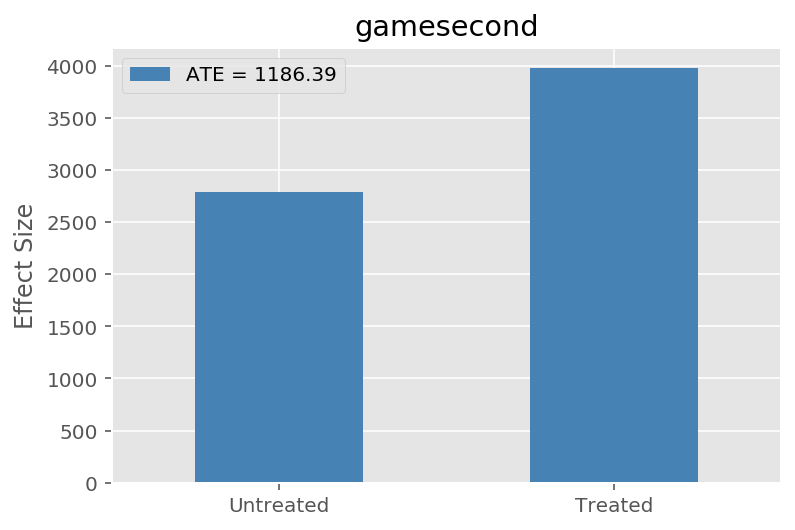

In [166]:
# # Plot Ajusted Effect
ps_model.plot_ajusted_effect(ps_model.estimate_ate())

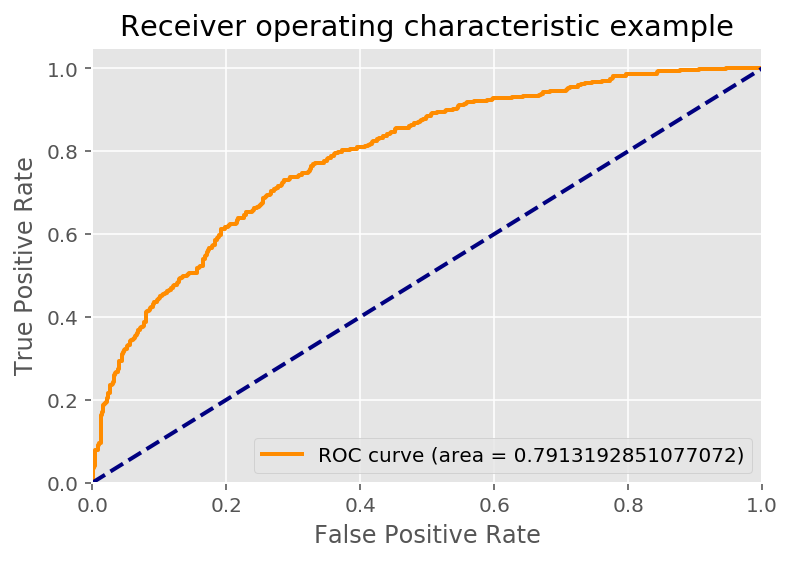

In [167]:
# Plot AUC
ps_model.plot_roc_curve()

In [168]:
# # Layer Effect
# ps_model.plot_layer_effect(n_layer=5)

In [171]:
# Ajusted Covariate
ps_model.ajusted_covariate(is_weited=True)

,Untreated_mean,Untreated_var,Treated_mean,Treated_var,d
0,7631.401582,5.323104e+07,14389.561941,9.497007e+07,0.785087
1,40.970065,1.154069e+02,42.405493,1.000635e+02,0.138294
2,0.632467,2.324525e-01,0.568274,2.453387e-01,-0.131337
3,0.646642,2.284961e-01,0.689352,2.141457e-01,0.090786
4,0.409260,2.417663e-01,0.436486,2.459659e-01,0.055132
5,355.726252,6.931256e+04,330.633624,7.329007e+04,-0.093972
6,3.564831,1.158397e+01,3.525813,1.179163e+01,-0.011413
7,0.102072,9.165339e-02,0.153988,1.302755e-01,0.155850
8,0.124096,1.086965e-01,0.068746,6.401971e-02,-0.188353
9,0.121881,1.070262e-01,0.037639,3.622187e-02,-0.314777
